# ripe or rotten mango?

### imports

En esta sección se instalan las dependencias e importan las librerías necesarias para manipulación de datos, preprocesamiento, visualización y modelos de machine learning.

In [2]:
%reload_ext autoreload
%autoreload 2
%pip install -q -r ../requirements.txt --user

import sys
sys.path.append('../')  

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

import pandas as pd 
from src.data import get_dataset, preprocess, graphic
from src.model import multivariate_regression, decision_tree, random_forest, neural_network

Note: you may need to restart the kernel to use updated packages.



### manejo de datos

Se descarga el conjunto de datos o en su defecto se carga de un archivo `train.csv` y creamos un DataFrame con los datos de entrenamiento para una inspección y análisis inicial.

In [ ]:
dataset = get_dataset()
print(f"Train dataset length: {len(dataset.train_data)}")
print(f"Validation dataset length: {len(dataset.validation_data)}")

Loaded dataset ../data/raw\train.csv in 0.02 seconds.
Loaded dataset ../data/raw\validation.csv in 0.01 seconds.
Train dataset length: 1989
Validation dataset length: 211


### feature engineering

Inicializamos el preprocesamiento a partir del conjunto de datos de entrenamiento para extraer características y aplicar PCA, organizando los resultados en los DataFrames `features_data` y `pca_data` para su análisis y modelado posterior.

In [24]:
processed = preprocess(dataset)

train_data = pd.DataFrame(processed.train_data)
validation_data = pd.DataFrame(processed.validation_data)
print(f"Train features shape: {train_data.shape}")
print(f"Validation features shape: {validation_data.shape}")

train_data.describe()

Loaded dataset ../data/processed\train.csv in 0.62 seconds.
Loaded dataset ../data/processed\validation.csv in 0.11 seconds.
Train features shape: (1989, 775)
Validation features shape: (211, 775)


,area,mean_r,mean_g,mean_b,std_dev_r,std_dev_g,std_dev_b,hist_0,hist_1,hist_2,...,hist_758,hist_759,hist_760,hist_761,hist_762,hist_763,hist_764,hist_765,hist_766,hist_767
count,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,...,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000,1989.000000
mean,0.051720,0.592256,0.470485,0.471403,0.314422,0.222632,0.263720,0.005568,0.002033,0.003344,...,0.006175,0.004955,0.010187,0.012329,0.028048,0.003137,0.003908,0.004744,0.005923,0.021722
std,0.069715,0.193260,0.206797,0.191707,0.145489,0.107167,0.158406,0.050034,0.026855,0.035203,...,0.037076,0.036532,0.039848,0.054134,0.087056,0.028906,0.024760,0.032237,0.033447,0.110282
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.019048,0.430980,0.336345,0.327903,0.195383,0.145694,0.139242,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.036900,0.567421,0.444197,0.477722,0.307014,0.204013,0.248827,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.054126,0.723532,0.588891,0.569229,0.400126,0.271593,0.350046,0.000000,0.000000,0.000000,...,0.001671,0.000725,0.002754,0.002594,0.004947,0.000370,0.000368,0.000428,0.000082,0.000323
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
processed.apply_pca()

train_pca = pd.DataFrame(processed.train_pca)
validation_pca = pd.DataFrame(processed.validation_pca)
print(f"PCA features shape: {train_pca.shape}")
print(f"PCA features shape: {validation_pca.shape}")

train_pca.describe()

PCA features shape: (1989, 32)
PCA features shape: (211, 32)


,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
count,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,...,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03,1.989000e+03
mean,2.143417e-17,1.428945e-17,-1.428945e-17,-1.428945e-17,-2.429206e-16,3.572362e-18,-1.259257e-16,-1.053847e-16,-8.484359e-17,-1.268188e-16,...,2.277381e-17,1.111898e-16,1.587468e-16,1.518254e-16,-1.294981e-16,9.913304e-17,-2.525213e-16,2.500653e-17,1.214603e-16,-6.742833e-17
std,1.505943e+00,1.057010e+00,7.449787e-01,6.773695e-01,5.994785e-01,5.262457e-01,4.975291e-01,4.223722e-01,4.049364e-01,3.827843e-01,...,1.994883e-01,1.955007e-01,1.879097e-01,1.803970e-01,1.713935e-01,1.698417e-01,1.642238e-01,1.601791e-01,1.561807e-01,1.525416e-01
min,-1.739502e+00,-2.848234e+00,-2.612047e+00,-1.982803e+00,-2.213795e+00,-3.785934e+00,-2.641184e+00,-2.173740e+00,-4.586107e+00,-1.629952e+00,...,-1.453401e+00,-1.860095e+00,-1.255210e+00,-9.514559e-01,-1.045617e+00,-8.706776e-01,-9.630033e-01,-1.173035e+00,-1.065697e+00,-7.965174e-01
25%,-9.858757e-01,-2.230730e-01,-3.860872e-01,-5.085294e-01,-3.656766e-01,-1.774237e-01,-2.355036e-01,-1.767140e-01,-1.553196e-01,-1.841831e-01,...,-9.642824e-02,-8.835100e-02,-6.966847e-02,-6.006729e-02,-7.744868e-02,-7.270480e-02,-7.494116e-02,-6.630079e-02,-5.701008e-02,-7.117815e-02
50%,-6.270497e-01,3.209350e-01,-1.201884e-01,-9.128479e-02,-3.894523e-02,-4.113748e-02,3.276324e-02,-3.937135e-02,-1.109603e-02,-2.363298e-02,...,-6.547931e-03,-2.216312e-03,-1.600398e-03,1.527574e-03,7.568181e-04,-4.207386e-03,-7.775304e-03,-1.518831e-03,-4.445559e-04,-8.240513e-03
75%,4.171472e-01,7.416827e-01,2.943019e-01,3.763524e-01,2.691018e-01,1.743112e-01,2.771536e-01,2.004362e-01,1.748701e-01,1.710937e-01,...,7.605700e-02,9.282830e-02,5.649268e-02,5.413497e-02,8.542192e-02,5.599260e-02,7.806083e-02,7.141938e-02,6.198331e-02,6.551344e-02
max,4.955415e+00,1.841057e+00,3.983529e+00,2.626106e+00,2.837308e+00,1.886339e+00,1.974326e+00,1.852504e+00,1.655696e+00,3.174318e+00,...,2.146162e+00,1.548379e+00,1.214930e+00,1.881625e+00,8.964944e-01,1.113068e+00,8.676592e-01,1.228242e+00,9.192446e-01,8.127465e-01


### exploración

La clase `graphic` proporciona métodos para visualizar los datos extraídos, generar histogramas, analizar estadísticas de los canales de color RGB, explorar correlaciones y visualizar el análisis de componentes principales (PCA) aplicado a las características de las imágenes de mangos en el conjunto de datos.

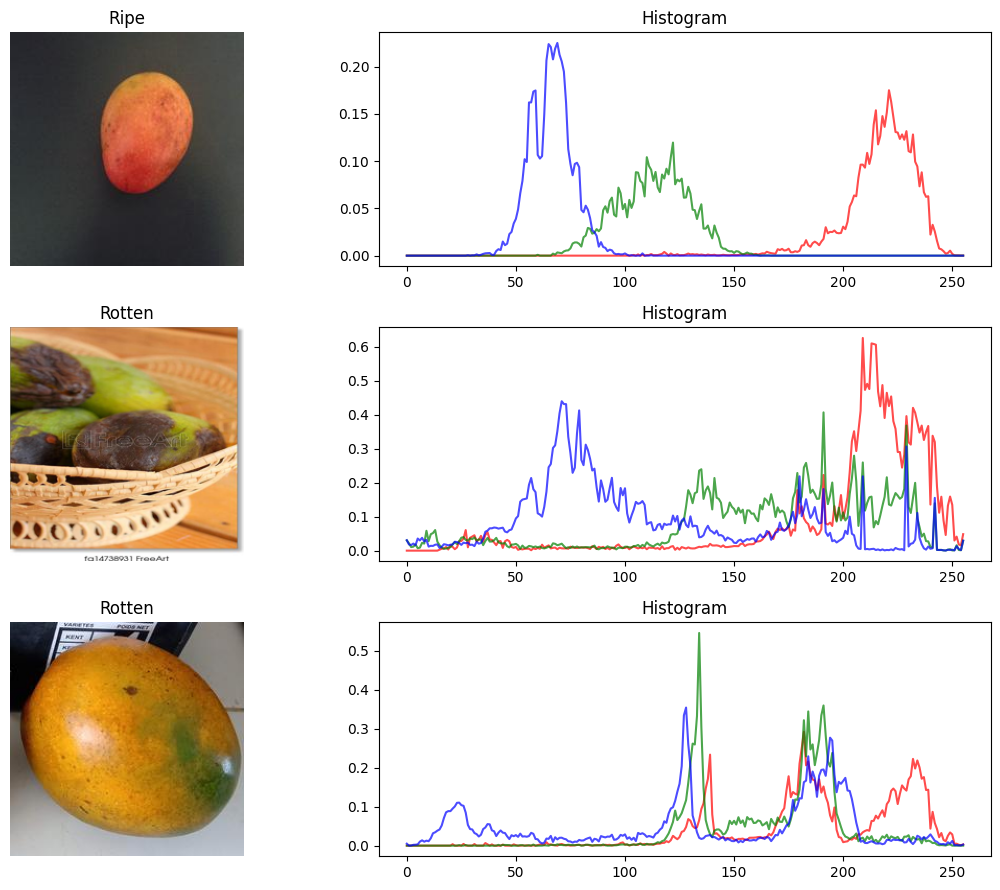

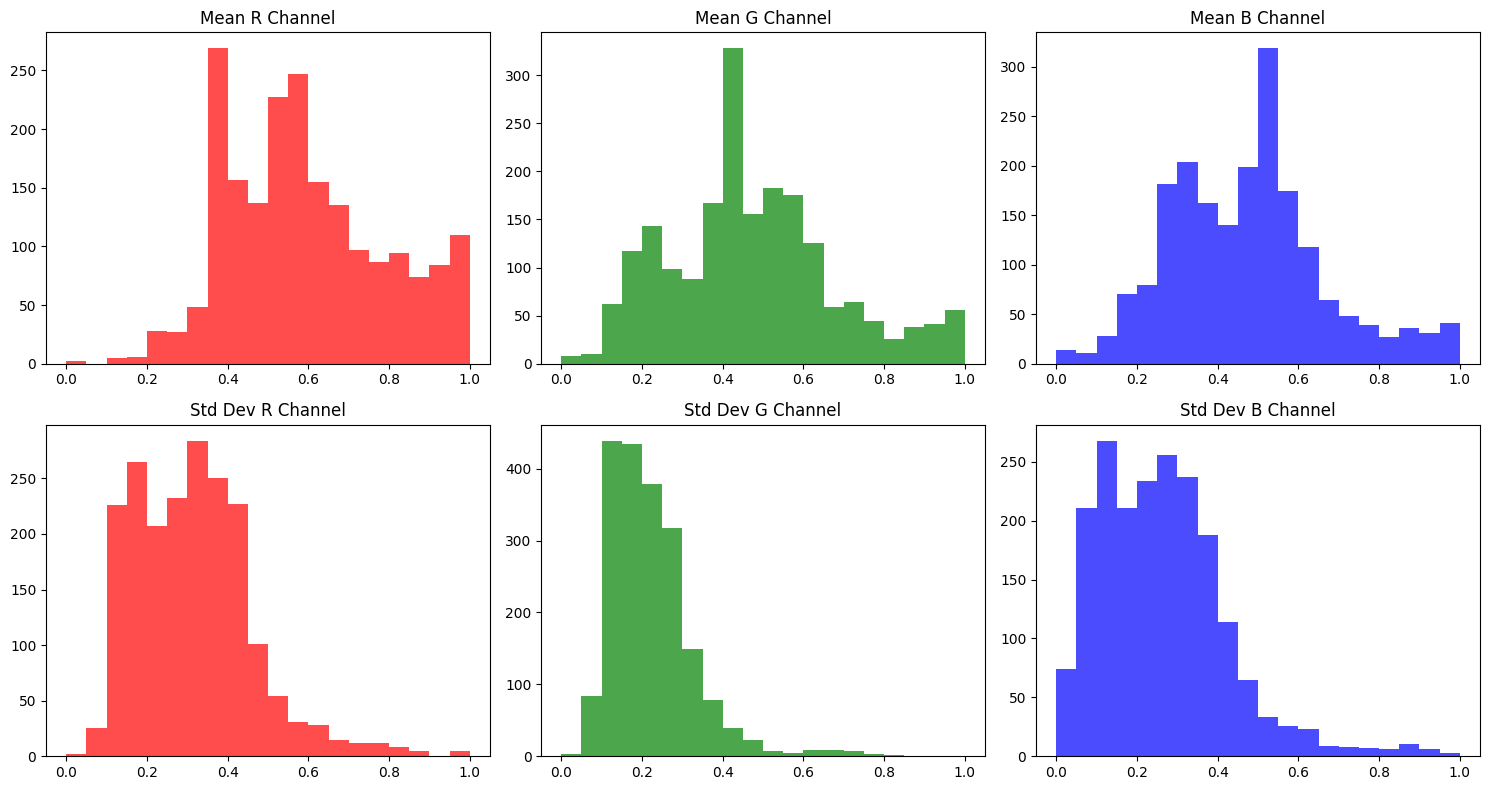

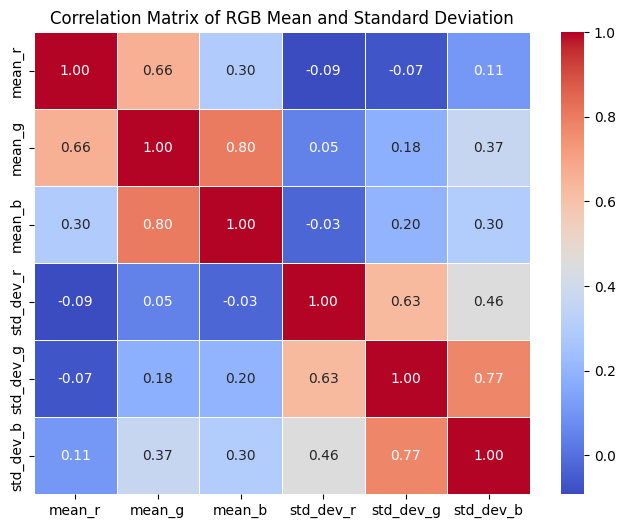

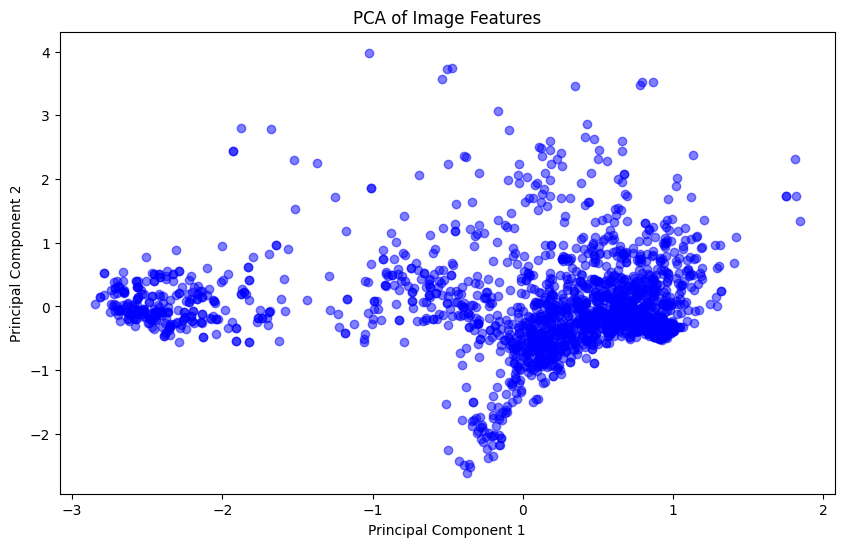

In [28]:
images = pd.DataFrame(dataset.train_data)
stats = train_data[['mean_r', 'mean_g', 'mean_b', 'std_dev_r', 'std_dev_g', 'std_dev_b']]
pca_x, pca_y = train_pca[1], train_pca[2]

graphic.show_samples(images, train_data, num_samples=3)
graphic.show_channels(stats)
graphic.show_correlation(stats)
graphic.show_pca(pca_x, pca_y)

In [30]:
x_train = {"features": train_data, "pca": train_pca}
x_validation = {"features": validation_data, "pca": validation_pca}
y_train, y_validation = dataset.get_labels()

In [ ]:
rnd = neural_network(x_train["pca"], y_train)